In [1]:
# importing the libraries 


In [2]:
import pandas as pd #data processing 
import numpy as np #calculate stuff
import seaborn as sns #visualization 
import matplotlib.pyplot as plt #visualization 

In [3]:
# loading the datasets 

In [7]:
pokemon_df = pd.read_csv("Datasets/pokemon.csv")
combats_df = pd.read_csv('Datasets/combats.csv')
test_df = pd.read_csv('Datasets/tests.csv')
prediction_df = test_df.copy()

In [8]:
# Visualization
# lets us see how the data looks

In [9]:
print(pokemon_df.head())

   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  


/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


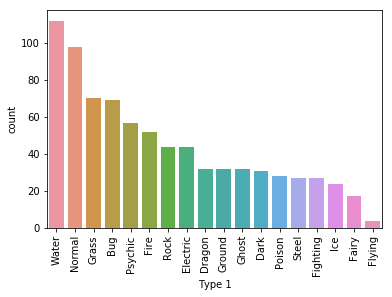

In [11]:
# lets count the number of types of pokemons
sns.countplot(x='Type 1', data=pokemon_df, order=pokemon_df['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


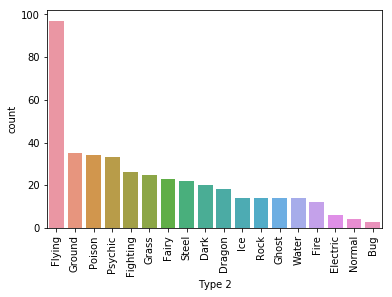

In [12]:
sns.countplot(x='Type 2', data = pokemon_df, order=pokemon_df['Type 2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [13]:
# lets explore pokemons by stats


In [15]:
pokemon_df['Total_stats'] = pokemon_df['HP'] + pokemon_df['Attack'] + pokemon_df['Defense'] + pokemon_df['Sp. Atk'] + pokemon_df['Sp. Def'] + pokemon_df['Speed']
print(pokemon_df.iloc[:, [1, -1]].head())

            Name  Total_stats
0      Bulbasaur          318
1        Ivysaur          405
2       Venusaur          525
3  Mega Venusaur          625
4     Charmander          309


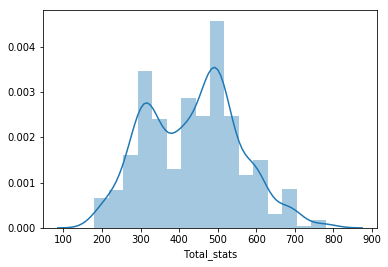

In [17]:
sns.distplot(pokemon_df.Total_stats) # plots a univariate distribution of observation
plt.show()

In [18]:
#average stats
mean_stats = pokemon_df['Total_stats'].mean()
print(mean_stats)

435.1025


In [19]:
# here are some pokemons whose total lies in the range of 430 and 440
# these are pretty average pokemons 


In [20]:
#closest value from near_stats
average_pokemon = min(pokemon_df['Total_stats'], key=lambda x: abs(x-mean_stats))
print(pokemon_df.loc[((pokemon_df['Total_stats'] >= average_pokemon-5) & (pokemon_df['Total_stats'] <= average_pokemon+5)), ['Name', 'Total_stats']])

           Name  Total_stats
29        Arbok          438
45   Wigglytuff          435
58      Persian          440
122     Tangela          435
126      Seadra          440
210    Quagsire          430
215  Misdreavus          435
222      Gligar          430
227    Qwilfish          430
233     Sneasel          430
300     Swellow          430
302    Pelipper          430
312    Vigoroth          440
331      Lairon          430
369    Lunatone          440
370     Solrock          440
384     Kecleon          440
531       Rotom          440
661       Klang          440
772     Dedenne          431


In [21]:
# Lets find out which is the strongest pokemon and which is the weakest one

In [25]:
sorted_pokemon_df = pokemon_df.sort_values(by= 'Total_stats')
# pokemon with the 20 lowest stats
print(sorted_pokemon_df[['Name','Total_stats']].head(20))

           Name  Total_stats
206     Sunkern          180
322     Azurill          190
446   Kricketot          194
288     Wurmple          195
16       Weedle          195
13     Caterpie          195
303       Ralts          198
732  Scatterbug          200
139    Magikarp          200
381      Feebas          200
291     Cascoon          205
186       Pichu          205
17       Kakuna          205
14      Metapod          205
289     Silcoon          205
209      Wooper          210
255     Tyrogue          210
188   Igglybuff          210
733      Spewpa          213
175     Sentret          215


In [26]:
# pokemon with the 20 Highest stats
print(sorted_pokemon_df[['Name','Total_stats', 'Legendary']].tail(20))

                       Name  Total_stats  Legendary
269                   Lugia          680       True
707                  Zekrom          680       True
540                  Dialga          680       True
544  Giratina Altered Forme          680       True
425                Rayquaza          680       True
268          Mega Tyranitar          700      False
796            Mega Diancie          700       True
418             Mega Latias          700       True
420             Mega Latios          700       True
711     Kyurem Black Kyurem          700       True
413          Mega Metagross          700      False
409          Mega Salamence          700      False
494           Mega Garchomp          700      False
712     Kyurem White Kyurem          700       True
552                  Arceus          720       True
424          Primal Groudon          770       True
422           Primal Kyogre          770       True
164           Mega Mewtwo Y          780       True
426         

In [27]:
# it seems Mega Mewtwo X is a bad ass pokemon
# Now I am curious which are the weakest legendary pokemons

In [29]:
legendary_pokemon = pokemon_df.loc[pokemon_df['Legendary'] == True]
legendary_pokemon = legendary_pokemon.sort_values(by='Total_stats')
print(legendary_pokemon[['Name', 'Total_stats']].head(20))


                          Name  Total_stats
156                   Articuno          580
539                      Azelf          580
699                   Cobalion          580
700                  Terrakion          580
701                   Virizion          580
702   Tornadus Incarnate Forme          580
703     Tornadus Therian Forme          580
704  Thundurus Incarnate Forme          580
538                    Mesprit          580
416                  Registeel          580
415                     Regice          580
705    Thundurus Therian Forme          580
158                    Moltres          580
157                     Zapdos          580
414                   Regirock          580
262                     Raikou          580
537                       Uxie          580
264                    Suicune          580
263                      Entei          580
794         Zygarde Half Forme          600


1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


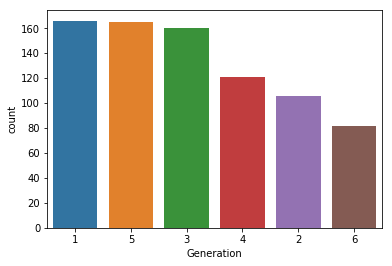

In [30]:
# Exploring Pokemons by generations
#new pokemon introduced on each generation, sort ascendingly
print(pokemon_df['Generation'].value_counts())

sns.countplot(x='Generation', data=pokemon_df, order=pokemon_df['Generation'].value_counts().index)
plt.show()


In [31]:
# let us see how the total stats relate with each generation, do the pokemon become stronger or weaker

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


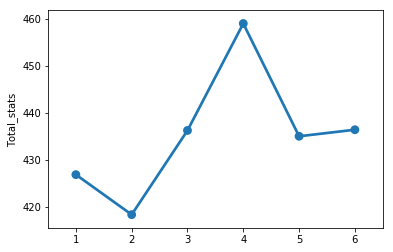

In [32]:
# group fata by generation
group_df = pokemon_df.drop(['#','Legendary'], axis=1)
pokemon_groups = group_df.groupby('Generation')
pokemon_groups_mean = pokemon_groups.mean()

sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Total_stats'])
plt.show()

In [33]:
# this means newer pokemons doesn't mean they are stronger
# now let us see what is the effect on the other stats


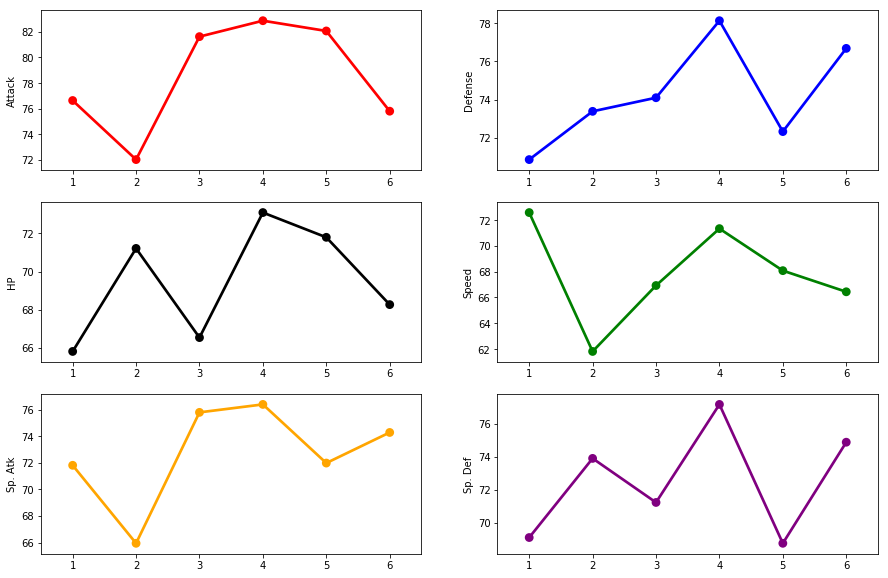

In [34]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Attack'], color='red', ax=axes[0][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Defense'], color='blue', ax=axes[0][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['HP'], color='black', ax=axes[1][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Speed'], color='green', ax=axes[1][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Atk'], color='orange', ax=axes[2][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Def'], color='purple', ax=axes[2][1])

plt.show()
